In [49]:
import warnings
warnings.filterwarnings ("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.decomposition import PCA
from keras.layers import Dense,Dropout, LSTM,GRU, SimpleRNN, Conv1D, Bidirectional,Flatten,Dense, Input
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
import matplotlib.dates as mdates

In [50]:
df = pd.read_csv('Domestic_Maple_Syrup_Production_2000-2021.csv')


In [51]:
x = ['Date_Open', 'Date_Closed']
for i in x:
  df[i] = pd.to_datetime(df[i],format='mixed')
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df['Year'] = df['Year'].dt.year
df

,State,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,Date_Open,Date_Closed,Year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.30,3.20,35.10,2021-02-15,2021-04-30,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.60,2.40,26.80,2021-02-01,2021-04-14,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.20,2.40,26.40,2021-01-11,2021-04-16,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.50,2.40,26.70,2021-01-01,2021-05-04,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.80,2.50,27.60,2021-01-04,2021-04-15,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,New York,1163,0.166,193,29.0,"6,090",28.1,24.3,1.35,15,NaT,NaT,2000
216,Ohio,432,0.222,96,34.3,"1,166",28.8,27.2,1.45,15.8,NaT,NaT,2000
217,Pennsylvania,360,0.192,69,28.4,"1,335",29.0,27.1,1.3,14.4,NaT,NaT,2000
218,Vermont,2090,0.132,275,30.0,"13,800",31.6,26.4,1.6,17.6,NaT,NaT,2000


In [52]:
df.dropna (inplace = True)

In [53]:
real_numeric_cols =['Production','Value','Wholesale_Price','Bulk_P_Price','Bulk_G_Price']
for i in real_numeric_cols:
  df[i]=df[i].str.replace(',','')
df.replace('(D)', None, inplace= True)

In [54]:
df1 = df[[ 'Num_of_Taps', 'Yield_per_Tap', 'Production', 'Avg_Price',
'Value', 'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price',
'Bulk_G_Price', 'State', 'Year' ]]

In [55]:
df

,State,Num_of_Taps,Yield_per_Tap,Production,Avg_Price,Value,Retail_Price,Wholesale_Price,Bulk_P_Price,Bulk_G_Price,Date_Open,Date_Closed,Year
0,Maine,1960,0.262,514,38.6,19840,61.4,48.30,3.20,35.10,2021-02-15,2021-04-30,2021
1,Michigan,550,0.273,150,46.3,6945,47.7,37.60,2.40,26.80,2021-02-01,2021-04-14,2021
2,New Hampshire,530,0.240,127,64.9,8242,65.5,48.20,2.40,26.40,2021-01-11,2021-04-16,2021
3,New York,2900,0.223,647,37.8,24457,45.6,41.50,2.40,26.70,2021-01-01,2021-05-04,2021
4,Pennsylvania,745,0.226,168,36.2,6082,41.3,39.80,2.50,27.60,2021-01-04,2021-04-15,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,New York,1830,0.240,439,40.6,17823,40.1,38.3,2.73,30,2009-01-05,2009-04-30,2009
126,Ohio,375,0.240,90,40.3,3627,37.7,35.9,2.7,29.9,2009-01-09,2009-04-16,2009
127,Pennsylvania,464,0.198,92,38.1,3505,38.0,32.2,2.7,29.5,2009-01-15,2009-04-25,2009
128,Vermont,3030,0.304,920,35.1,32292,43.9,38.5,2.9,32,2009-01-22,2009-05-04,2009


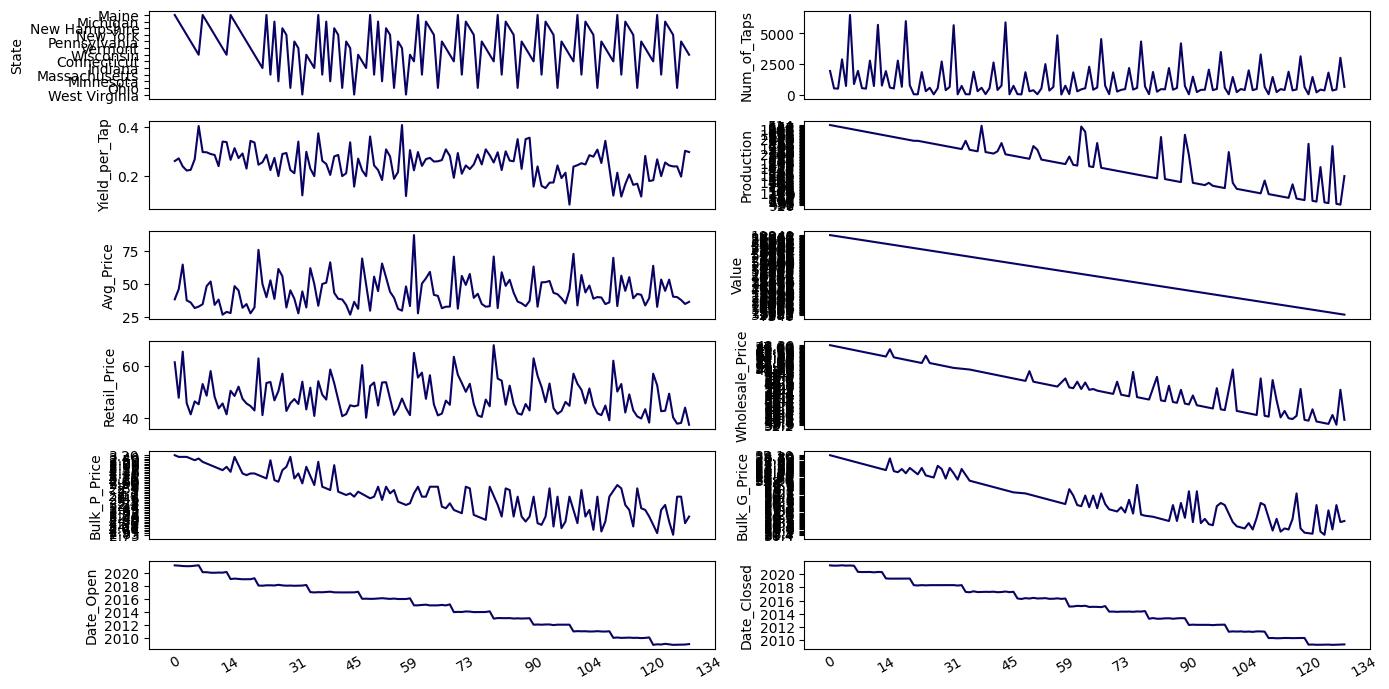

In [56]:
# Plot line charts
df_plot = df.copy()
ncols = 2
nrows = int(round(df_plot.shape[1] / ncols, 0))
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 7))
for i, ax in enumerate(fig.axes):
        sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
        ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
fig.tight_layout()
plt.show()

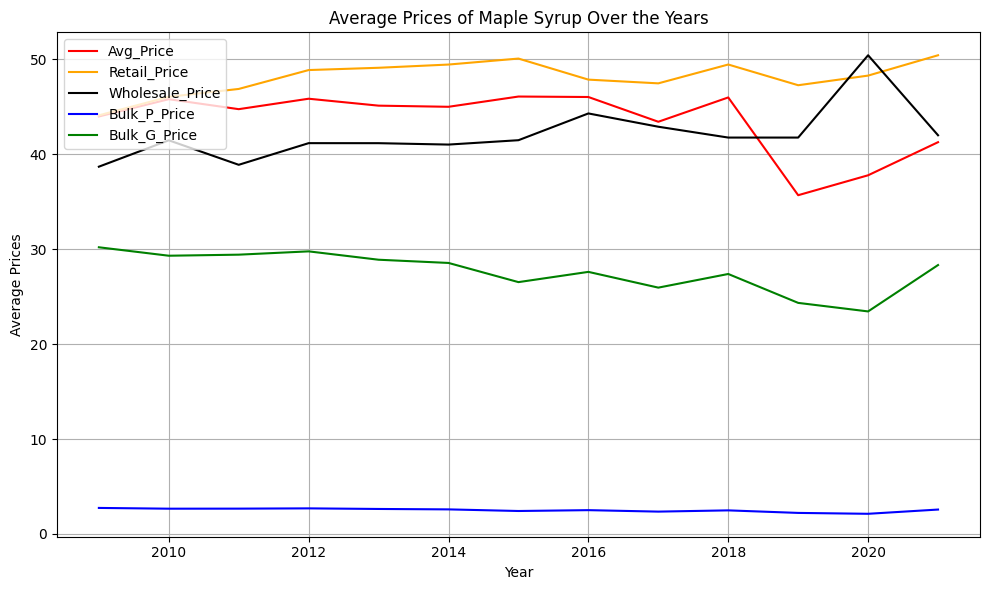

In [57]:
# Convert relevant columns to numeric types
numeric_columns = ['Avg_Price', 'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price', 'Bulk_G_Price']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Group by 'Year' and calculate the mean
average_prices_over_years = df.groupby('Year')[numeric_columns].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
years = average_prices_over_years['Year']
colors = ['red', 'orange', 'black', 'blue', 'green']
price_columns = numeric_columns  # Use the same columns for plotting

for i in range(len(colors)):
    plt.plot(years, average_prices_over_years[price_columns[i]], label=price_columns[i], color=colors[i])

plt.xlabel('Year')
plt.ylabel('Average Prices')
plt.title('Average Prices of Maple Syrup Over the Years')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

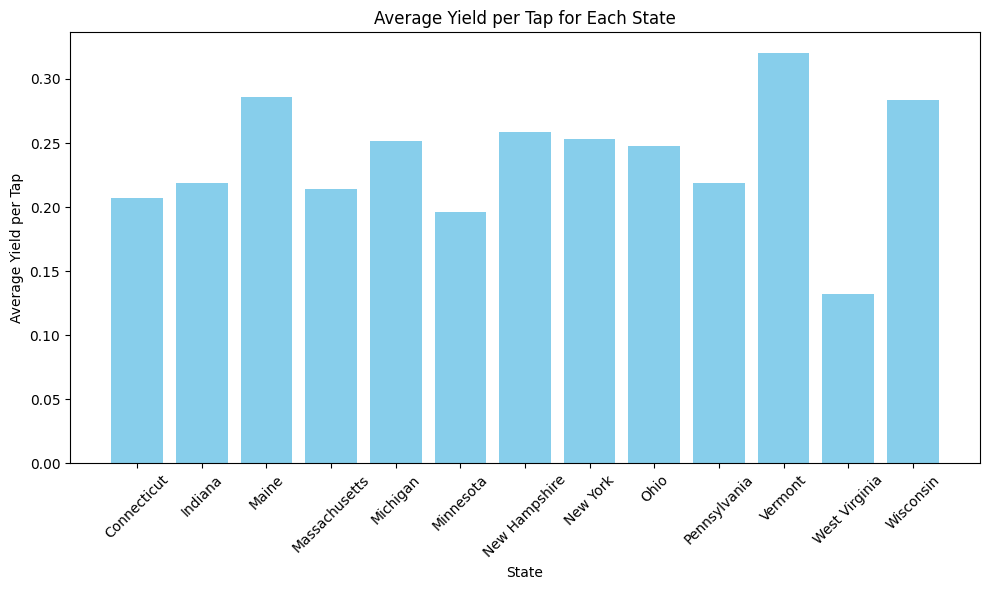

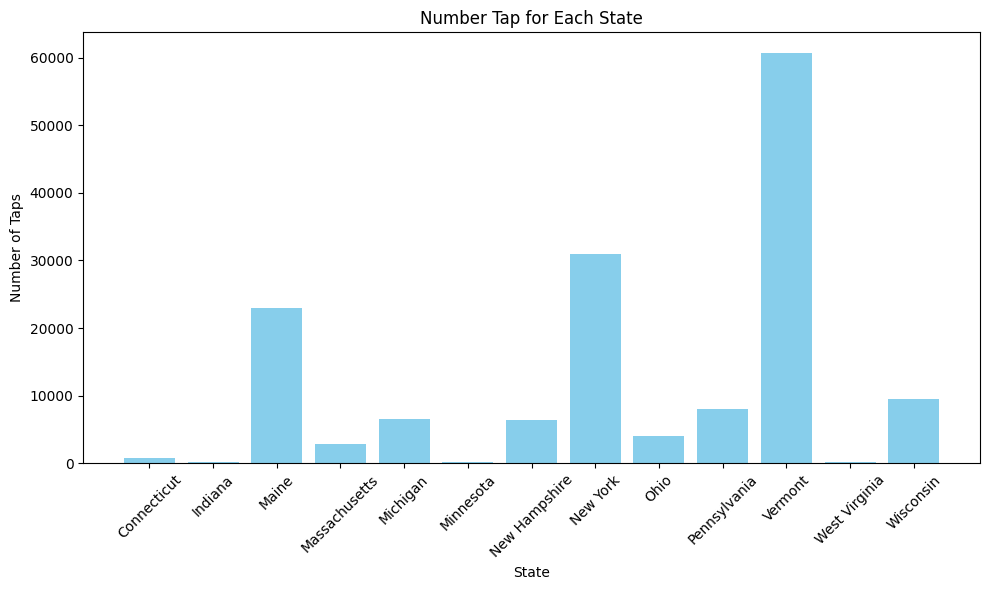

In [58]:
average_yield_per_tap = df.groupby('State')['Yield_per_Tap'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.bar (average_yield_per_tap['State'], average_yield_per_tap['Yield_per_Tap'], color= 'skyblue')
plt.xlabel('State')
plt. ylabel('Average Yield per Tap')
plt.title('Average Yield per Tap for Each State')
plt.xticks(rotation=45)
plt. tight_layout()
plt. show()
Num_of_Taps_viz = df.groupby('State')['Num_of_Taps'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(Num_of_Taps_viz['State'], Num_of_Taps_viz['Num_of_Taps'], color='skyblue')
plt.xlabel ('State')
plt.ylabel('Number of Taps')
plt.title( 'Number Tap for Each State')
plt.xticks(rotation=45)
plt. tight_layout()
plt.show()

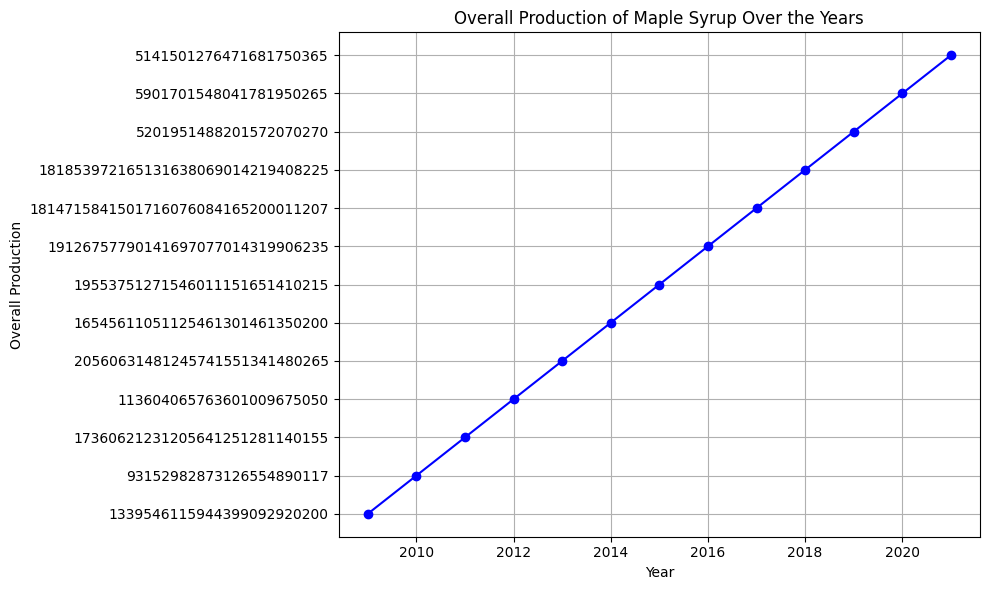

In [59]:
overall_production = df.groupby('Year')['Production']. sum().reset_index()
plt.figure(figsize=(10, 6))
years = overall_production[ 'Year']
production = overall_production['Production']
plt.plot (years, production, marker='o', color='b')
plt.xlabel('Year')
plt.ylabel ('Overall Production')
plt.title('Overall Production of Maple Syrup Over the Years')
plt.grid(True)
plt.tight_layout()
plt.show()

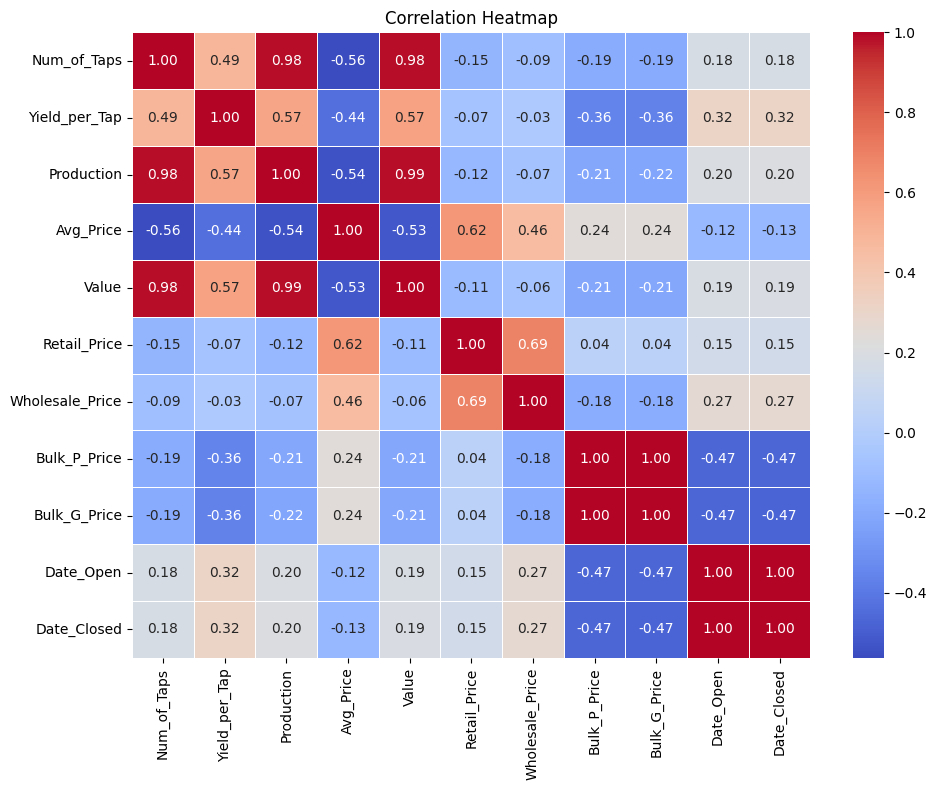

In [60]:
selected_columns = ['Num_of_Taps', 'Yield_per_Tap', 'Production', 'Avg_Price', 'Value',
          'Retail_Price', 'Wholesale_Price', 'Bulk_P_Price', 'Bulk_G_Price',
          'Date_Open', 'Date_Closed']
selected_df = df[selected_columns]
correlation_matrix = selected_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [61]:
df = pd.get_dummies (df, columns = ['State', 'Year'])

In [62]:
y = df1['Avg_Price']
x = df1.drop(['Avg_Price', 'State', 'Year', 'Num_of_Taps'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=30)

In [74]:
#from sklearn.preprocessing import StandardScaler as scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
y_train = scaler.fit_transform(y_train.reshape(-1,1))
y_test = scaler.fit_transform(y_test.reshape(-1,1))

In [64]:
inputs = Input (shape=(X_train.shape[1],1))
print (inputs.shape)
X = LSTM(64, return_sequences=True) (inputs)
X = Dropout(0.50)(X)
X = LSTM(16)(X)
X = Flatten()(X)
X = tf. keras.layers.Dense(64,activation= 'relu' )(X)
X = Dropout (0.40)(X)
X = tf.keras.layers.Dense(16,activation= 'relu') (X)
outputs = Dense(1, activation= 'relu')(X)
print (outputs. shape)
model_2 = tf.keras.Model (inputs, outputs)
model_2.summary ()

(None, 7, 1)
(None, 1)
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 7, 1)]            0         
                                                                 
 lstm_4 (LSTM)               (None, 7, 64)             16896     
                                                                 
 dropout_4 (Dropout)         (None, 7, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 16)                5184      
                                                                 
 flatten_2 (Flatten)         (None, 16)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                1088      
                                                                 
 dropout_5 (Dropout)         (None, 

In [65]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(),
loss='mse',
metrics=['mse'])

In [66]:
history_2 = model_2. fit(X_train,
y_train,
epochs=100)

Epoch 1/100
4/4 [==============================] - 3s 3ms/step - loss: 0.1162 - mse: 0.1162
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1097 - mse: 0.1097
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1025 - mse: 0.1025
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.0954 - mse: 0.0954
Epoch 5/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0891 - mse: 0.0891
Epoch 6/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0829 - mse: 0.0829
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0771 - mse: 0.0771
Epoch 8/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0719 - mse: 0.0719
Epoch 9/100
4/4 [==============================] - 0s 11ms/step - loss: 0.0667 - mse: 0.0667
Epoch 10/100
4/4 [==============================] - 0s 10ms/step - loss: 0.0625 - mse: 0.0625
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0

In [67]:
model_2.evaluate(X_test,y_test)

1/1 [==============================] - 1s 671ms/step - loss: 0.0846 - mse: 0.0846


[0.0846087783575058, 0.0846087783575058]

In [68]:
print(type(y_test))
y_pred_scaled = model_2.predict(X_test)
y_pred =y_pred_scaled
y_test_unscaled = y_test.reshape(-1, 1)
MAE = mean_absolute_error (y_test_unscaled, y_pred)
print (f'Median Absolute Error (MAE): {np.round (MAE, 2)}')
МАРЕ = np.mean((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled))) * 100
print (f'Mean Absolut nomentage Error (MAPE): {np. round (MAE, 2)} %')
MDAPE = np. median((np.abs(np.subtract(y_test_unscaled, y_pred)/ y_test_unscaled)) )* 100
print (f'Median Absolute Percentage Error (DAPE): {np.round (MDAPE, 2)} %')

<class 'numpy.ndarray'>
1/1 [==============================] - 1s 600ms/step
Median Absolute Error (MAE): 0.22
Mean Absolut nomentage Error (MAPE): 0.22 %
Median Absolute Percentage Error (DAPE): 51.48 %


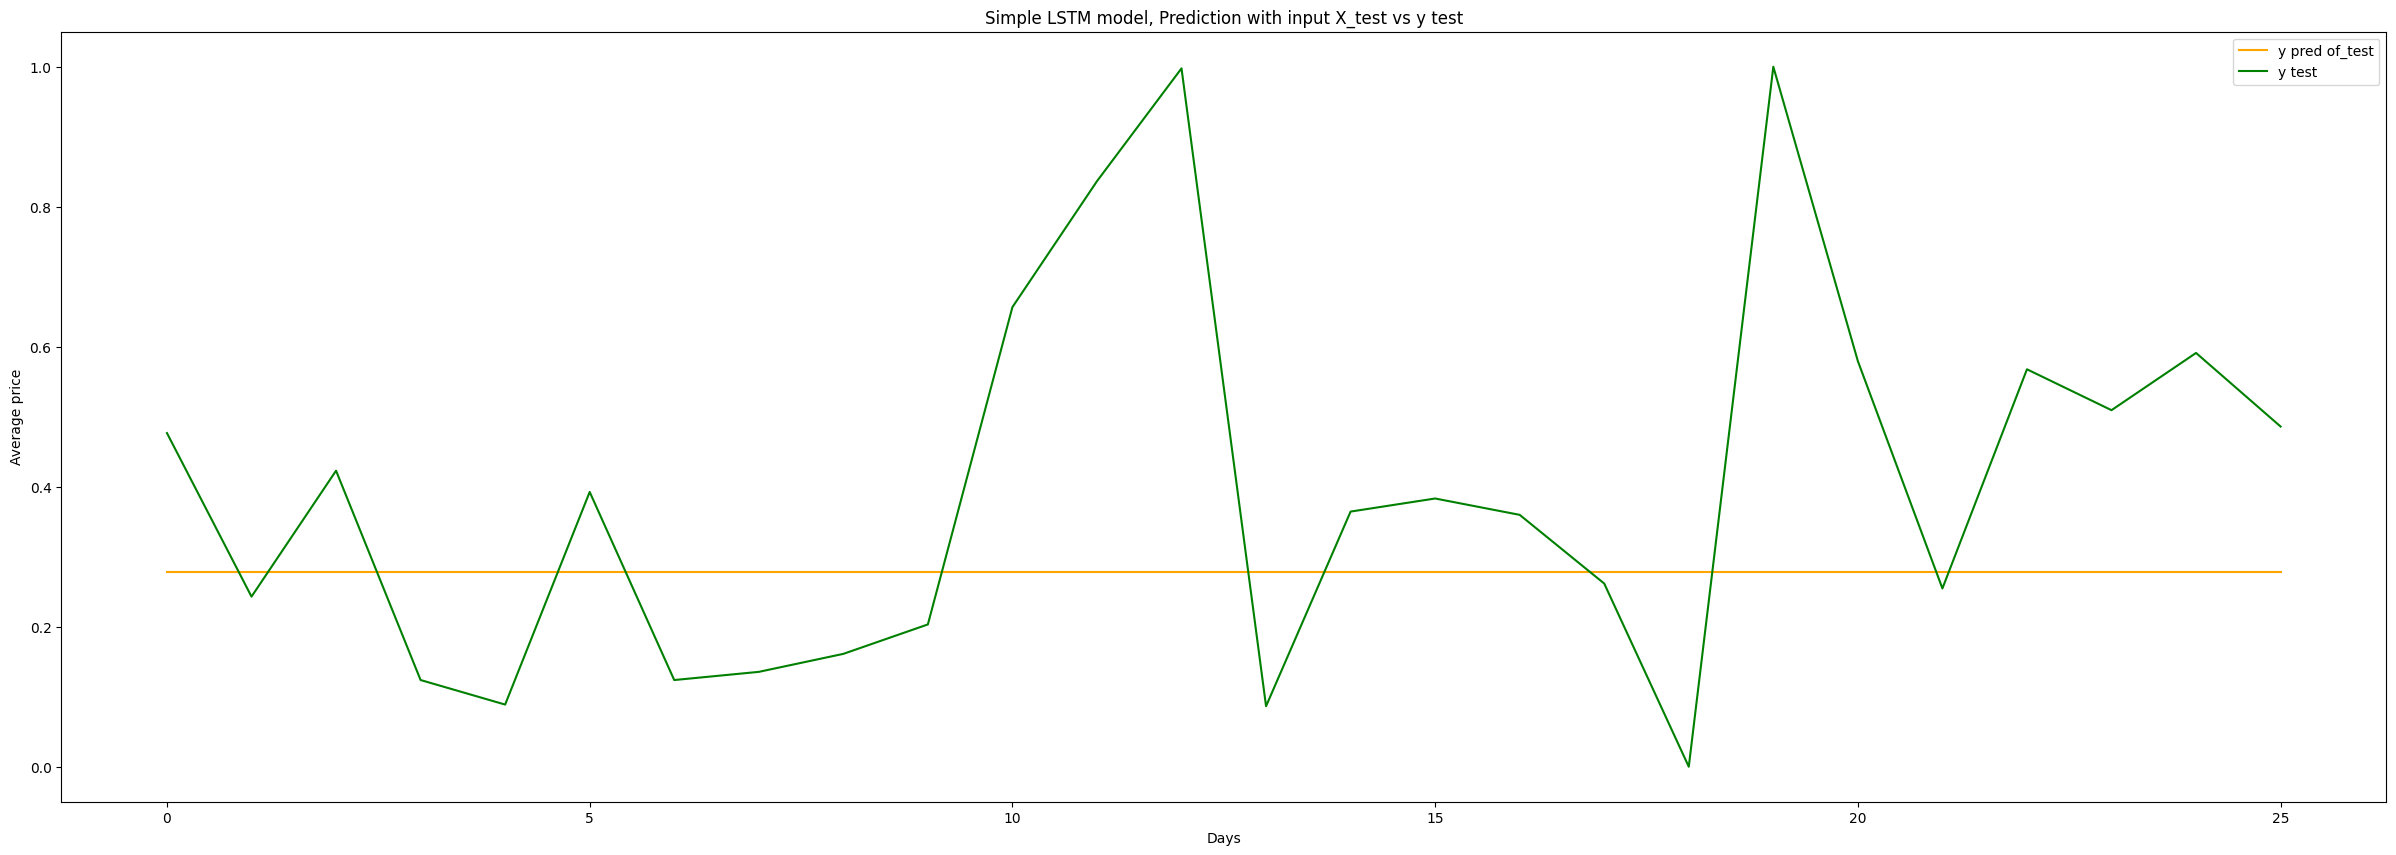

In [75]:
plt.figure(figsize = (30,10))
plt. plot(y_pred, label = "y pred of_test", c = "orange")
plt.plot(y_test_unscaled, label = "y test", c = "g")
plt.xlabel ("Days")
plt.ylabel ("Average price")
plt.title("Simple LSTM model, Prediction with input X_test vs y test")
plt.legend()
plt.show()

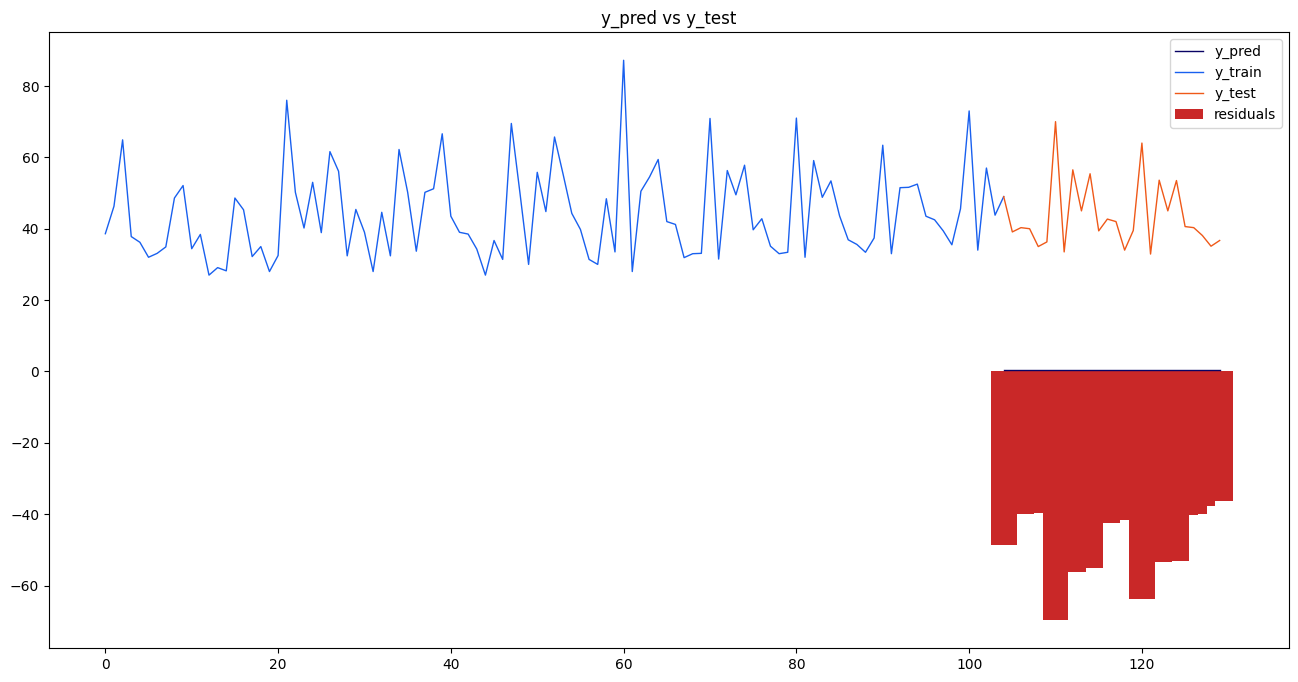

In [70]:
train = pd.DataFrame(df1['Avg_Price'][:len(X_train)+1]).rename(columns={"Avg_Price":'y_train'})
valid = pd.DataFrame(df1['Avg_Price'][len(X_train):]).rename(columns={"Avg_Price":'y_test'})
valid.insert(1,'y_pred',y_pred, True)
valid.insert(1,'residuals',valid['y_pred']-valid['y_test'],True)
df_union = pd.concat([train,valid])
fig,ax1 = plt.subplots(figsize=(16,8))
plt.title('y_pred vs y_test')
sns.set_palette(['#090364','#1960EF','#EF5919'])
sns.lineplot(data=df_union[['y_pred','y_train','y_test']],linewidth=1.0,dashes=False,ax=ax1)
df_sub=['#2BC97A' if x>0 else '#C92828' for x in df_union['residuals'].dropna()]
ax1.bar(height=df_union['residuals'].dropna(),x=df_union['residuals'].dropna().index,width=3,label='residuals',color = df_sub)
plt.legend()
plt.show()

In [71]:
import pickle
pickle.dump(model_2,open('model1.pkl','wb'))